In [28]:
import pickle
import pandas as pd
import networkx as nx
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.graph import  glycan_to_nxGraph
from glycowork.motif.graph import  subgraph_isomorphism


In [46]:
flex_data_path = '/Users/xakdze/PycharmProjects/GlyContact_analyses/data/glycan_graphs.pkl'

def load_data():
    """Load glycan flexibility data and binding data."""
    with open(flex_data_path, 'rb') as file:
        flex_data = pickle.load(file)
    # binding_df = pd.read_csv(flex_data_path)
    return flex_data
flex_data = load_data()

In [47]:
def map_daniel_to_luc_graph(matched_glycan, flex_data, daniel_selected_nodes):
    """
    Map selected nodes from a Daniel graph to a corresponding Luc graph based on a predefined mapping.
    """
    daniel_graph = glycan_to_nxGraph(matched_glycan)
    luc_graph = flex_data.get(matched_glycan)

    # Define the mapping logic between Daniel and Luc graphs
    def create_mapping():
        if len(daniel_graph.nodes) % 2 == 1:
            dan_max = len(daniel_graph.nodes)
            luc_max = len(luc_graph.nodes)
            map_dict = dict(zip(range(0, dan_max, 2), range(luc_max, 0, -1)))
        else:
            dan_max = len(daniel_graph.nodes) - 1
            luc_max = len(luc_graph.nodes)
            map_dict = dict(zip(range(0, dan_max, 2), range(luc_max, 0, -1)))
        return map_dict
    # Generate the mapping dictionary
    map_dict = create_mapping()

    # Map the selected nodes from the Daniel graph to the Luc graph
    luc_selected_nodes = []
    for node in daniel_selected_nodes:
        if node in map_dict:
            luc_selected_nodes.append(map_dict[node])

    return luc_selected_nodes

In [48]:
#def process_glycan_with_motifs(
matched_glycan= "Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc"
properties= {'motif': ['Fuc'], 'termini_list': [['t']]}
flex_data=  load_data()

"""
Process a glycan string to find nodes matching binding motifs and calculate metrics.
Handles both single and multiple binding motifs.
"""
matching_monosaccharides, sasa_weighted, flexibility_weighted, found_motifs = [], [], [], []

motifs = properties["motif"]
termini_list = properties["termini_list"]

for motif, termini in zip(motifs, termini_list):

# Perform subgraph isomorphism
    is_present, matched_nodes = subgraph_isomorphism(
        matched_glycan, motif,
        return_matches=True,
        termini_list=termini
    )
    print(f"subgraph isomorphism: matched_nodes: {matched_nodes}")
    if not is_present:
        continue


    found_motifs.append(motif)
    print("")
    print(f"matched_glycan: {matched_glycan}")
    print(f"Processing motif: {motif}")

    matched_nodes = [node for sublist in matched_nodes for node in sublist] \
        if isinstance(matched_nodes[0], list) else matched_nodes


print(f"matched_nodes: {matched_nodes}")

subgraph isomorphism: matched_nodes: [[0], [4], [8]]

matched_glycan: Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc
Processing motif: Fuc
matched_nodes: [0, 4, 8]


In [49]:
matched_mono = [matched_nodes[index] for index in range(0, len(matched_nodes), 2)]
print(f"matched_mono: {matched_mono}")

selected_mono = map_daniel_to_luc_graph(matched_glycan, flex_data, matched_mono)

selected_mono = map_daniel_to_luc_graph(matched_glycan, flex_data, matched_nodes)
print(f"selected_mono: {selected_mono}")


# Extract attributes from graph nodes
graph = flex_data.get(matched_glycan)
if graph and hasattr(graph, "nodes"):
    #print(f"graph.nodes: {graph.nodes}")
    #print(f"graph.attributes: {graph.nodes(data=True)}")
    for mono in selected_mono:
        try:
            attributes = graph.nodes[mono]
            matching_monosaccharides.append(attributes.get("Monosaccharide", 0))
            sasa_weighted.append(attributes.get("Weighted Score", 0))
            flexibility_weighted.append(attributes.get("weighted_mean_flexibility", 0))
            print(f"matching_monosaccharides: {matching_monosaccharides}")
            print(f"mono attributes: {attributes}")
        except Exception as e:
            print(f"Error extracting attributes for node {mono} in glycan {matched_glycan}: {e}")


matched_mono: [0, 8]
selected_mono: [10, 8, 6]
matching_monosaccharides: ['Fuc(a1-3)']
mono attributes: {'Monosaccharide': 'Fuc(a1-3)', 'Mean Score': 1.8676189828198404, 'Median Score': 1.8176706893136725, 'Weighted Score': 1.9261586474572951, 'weighted_mean_flexibility': 16.641286591340865}
matching_monosaccharides: ['Fuc(a1-3)', 'Gal(b1-4)']
mono attributes: {'Monosaccharide': 'Gal(b1-4)', 'Mean Score': 1.7647929069120436, 'Median Score': 1.7578037350904197, 'Weighted Score': 1.7861381799561076, 'weighted_mean_flexibility': 15.575945445455453}
matching_monosaccharides: ['Fuc(a1-3)', 'Gal(b1-4)', 'Fuc(a1-3)']
mono attributes: {'Monosaccharide': 'Fuc(a1-3)', 'Mean Score': 1.81364550429862, 'Median Score': 1.891440232633613, 'Weighted Score': 1.8669023368021382, 'weighted_mean_flexibility': 22.883701009899013}


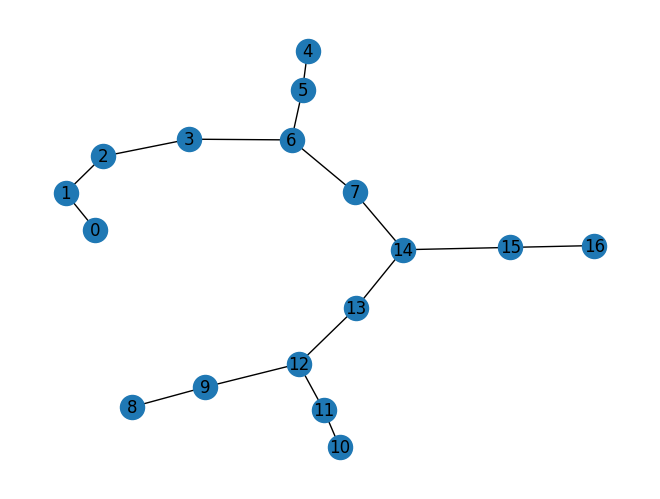

In [37]:
fuc_3 = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc')
nx.draw(fuc_3, with_labels=True)

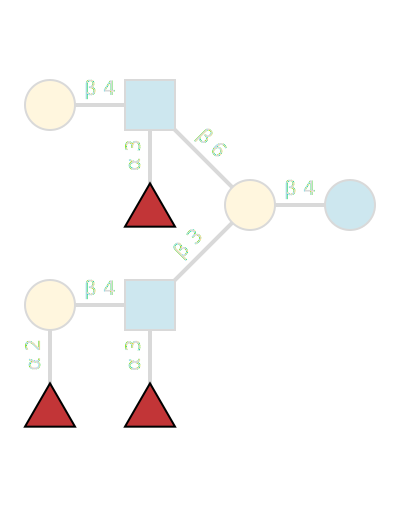

In [29]:
GlycoDraw('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc', highlight_motif='Fuc')